In [145]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from scipy import stats

In [3]:
stores = pd.read_csv('../data/stores.csv')
features = pd.read_csv('../data/features.csv')
train = pd.read_csv('../data/train.csv')

In [4]:
print(type(stores))
print(type(features))
print(type(train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [5]:
def display_table_info(dataframes, names, n=4):
    for df, name in zip(dataframes, names):
        print(f"--- {name} Data Info ---")
        df.info()
        print("\n")
        print(f"--- {name} Data Description ---")
        print(df.describe())
        print("\n")
        print(f"--- {name} Data Size ---")
        print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
        print("\n")
        print(f"--- {name} Data Columns ---")
        print(df.columns)
        print("\n")


In [6]:
dataframes = [stores, features, train]
names = ["Stores", "Features", "Train"]


display_table_info(dataframes, names)

--- Stores Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


--- Stores Data Description ---
           Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000


--- Stores Data Size ---
Rows: 45, Columns: 3


--- Stores Data Columns ---
Index(['Store', 'Type', 'Size'], dtype='object')


--- Features Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------    

In [7]:
stores.head(4)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863


In [8]:
features.head(4)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False


In [9]:
train.head(4)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False


## DATA PREPARATION 

In [11]:
# merging data
data = train.merge(stores, on='Store').merge(features, on=['Store','Date', 'IsHoliday'], how='left')

In [12]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [13]:
data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [14]:
data.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], inplace=True, axis=1)

In [15]:
data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [16]:
data.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106


In [17]:
# check how many records have weekly sales values less or equal zero
(data['Weekly_Sales'] <= 0).sum()

1358

In [18]:
# remove invalid data
data = data.loc[data['Weekly_Sales'] > 0]

In [19]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,192.330854,8.667


In [20]:
data['Weekly_Sales'].min()

0.01

In [21]:
print(data.duplicated().sum())

0


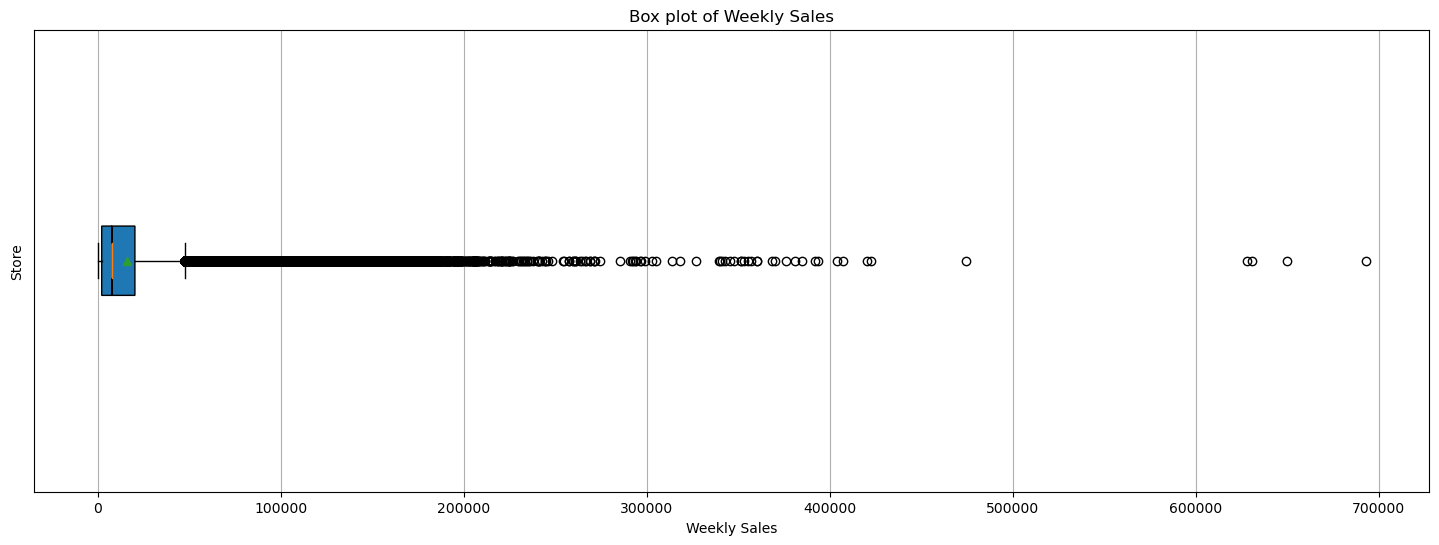

In [22]:
plt.figure(figsize=(18, 6))
plt.boxplot(data['Weekly_Sales'], vert=False, patch_artist=True, notch=True, showfliers=True, showmeans=True)
plt.title('Box plot of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Store')
plt.yticks([])
plt.grid(True)
plt.show()


In [23]:
sales_description = data['Weekly_Sales'].describe()
print(sales_description)

count    420212.000000
mean      16033.114591
std       22729.492116
min           0.010000
25%        2120.130000
50%        7661.700000
75%       20271.265000
max      693099.360000
Name: Weekly_Sales, dtype: float64


### how many stores type are present?

In [24]:
data['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [25]:
type_counts = data['Type'].value_counts()

In [26]:
type_counts

A    214961
B    162787
C     42464
Name: Type, dtype: int64

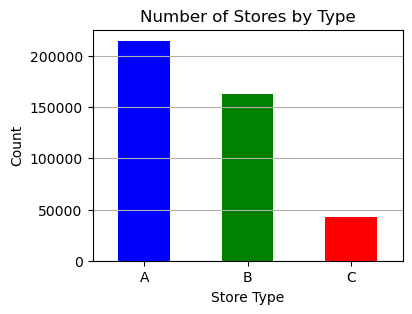

In [27]:
plt.figure(figsize=(4, 3))
type_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Number of Stores by Type')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.grid(axis='y') 
plt.show()

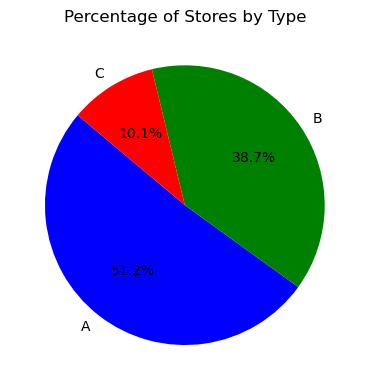

In [28]:
type_counts = data['Type'].value_counts(normalize=True) * 100

plt.figure(figsize=(4, 4))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['blue', 'green', 'red'], startangle=140)
plt.title('Percentage of Stores by Type')

plt.tight_layout()
plt.show()


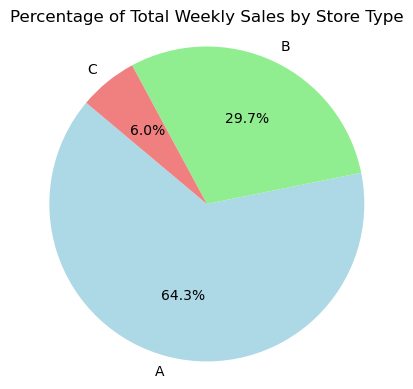

In [29]:
sales_by_type = data.groupby('Type')['Weekly_Sales'].sum()

total_sales = sales_by_type.sum()
sales_percentages = (sales_by_type / total_sales) * 100

plt.figure(figsize=(4, 4))
plt.pie(sales_percentages, labels=sales_percentages.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Percentage of Total Weekly Sales by Store Type')
plt.axis('equal') 
plt.tight_layout()
plt.show()


In [30]:
sales_by_type

Type
A    4.331057e+09
B    2.000742e+09
C    4.055080e+08
Name: Weekly_Sales, dtype: float64

Type A stores make up the majority in the number of stores and also generate a significant share of total sales. Type B stores rank second in both number and sales, while Type C stores have the smallest share of both.

### Extract year, month and week from date object

In [31]:
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Week'] = pd.DatetimeIndex(data['Date']).week


C:\Users\ALA\AppData\Local\Temp\ipykernel_19996\962991392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = pd.DatetimeIndex(data['Date']).year
C:\Users\ALA\AppData\Local\Temp\ipykernel_19996\962991392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = pd.DatetimeIndex(data['Date']).month
C:\Users\ALA\AppData\Local\Temp\ipykernel_19996\962991392.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns 

In [32]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,2010,2,5
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,2010,2,6
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,2010,2,7
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,2010,2,8
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,192.013558,8.684,2012,9,39
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,192.170412,8.667,2012,10,40
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,192.327265,8.667,2012,10,41
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,192.330854,8.667,2012,10,42


In [33]:
print(data.dtypes)

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Year              int64
Month             int64
Week              int64
dtype: object


### Correlation matrix

In [34]:
correlation_matrix = data.corr()

In [35]:
correlation_matrix

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
Store,1.000000,0.024258,-0.085117,-0.000522,-0.182763,-0.050230,0.065321,-0.211261,0.208759,0.002831,0.000907,0.000926
Dept,0.024258,1.000000,0.148749,0.000663,-0.002491,0.004727,0.003544,-0.007178,0.007787,0.003716,0.000800,0.000767
Weekly_Sales,-0.085117,0.148749,1.000000,0.012843,0.244117,-0.002339,0.000089,-0.021162,-0.025806,-0.010015,0.028401,0.027659
IsHoliday,-0.000522,0.000663,0.012843,1.000000,0.000797,-0.155775,-0.078155,-0.001933,0.010555,-0.056572,0.123058,0.127846
Size,-0.182763,-0.002491,0.244117,0.000797,1.000000,-0.058413,0.003632,-0.003903,-0.068335,-0.004716,-0.001051,-0.001130
Temperature,-0.050230,0.004727,-0.002339,-0.155775,-0.058413,1.000000,0.143700,0.182223,0.096768,0.065712,0.235957,0.236256
Fuel_Price,0.065321,0.003544,0.000089,-0.078155,0.003632,0.143700,1.000000,-0.164199,-0.033915,0.779681,-0.040931,-0.031191
CPI,-0.211261,-0.007178,-0.021162,-0.001933,-0.003903,0.182223,-0.164199,1.000000,-0.299887,0.074547,0.005366,0.006428
Unemployment,0.208759,0.007787,-0.025806,0.010555,-0.068335,0.096768,-0.033915,-0.299887,1.000000,-0.237210,-0.012562,-0.015614
Year,0.002831,0.003716,-0.010015,-0.056572,-0.004716,0.065712,0.779681,0.074547,-0.237210,1.000000,-0.194295,-0.181804


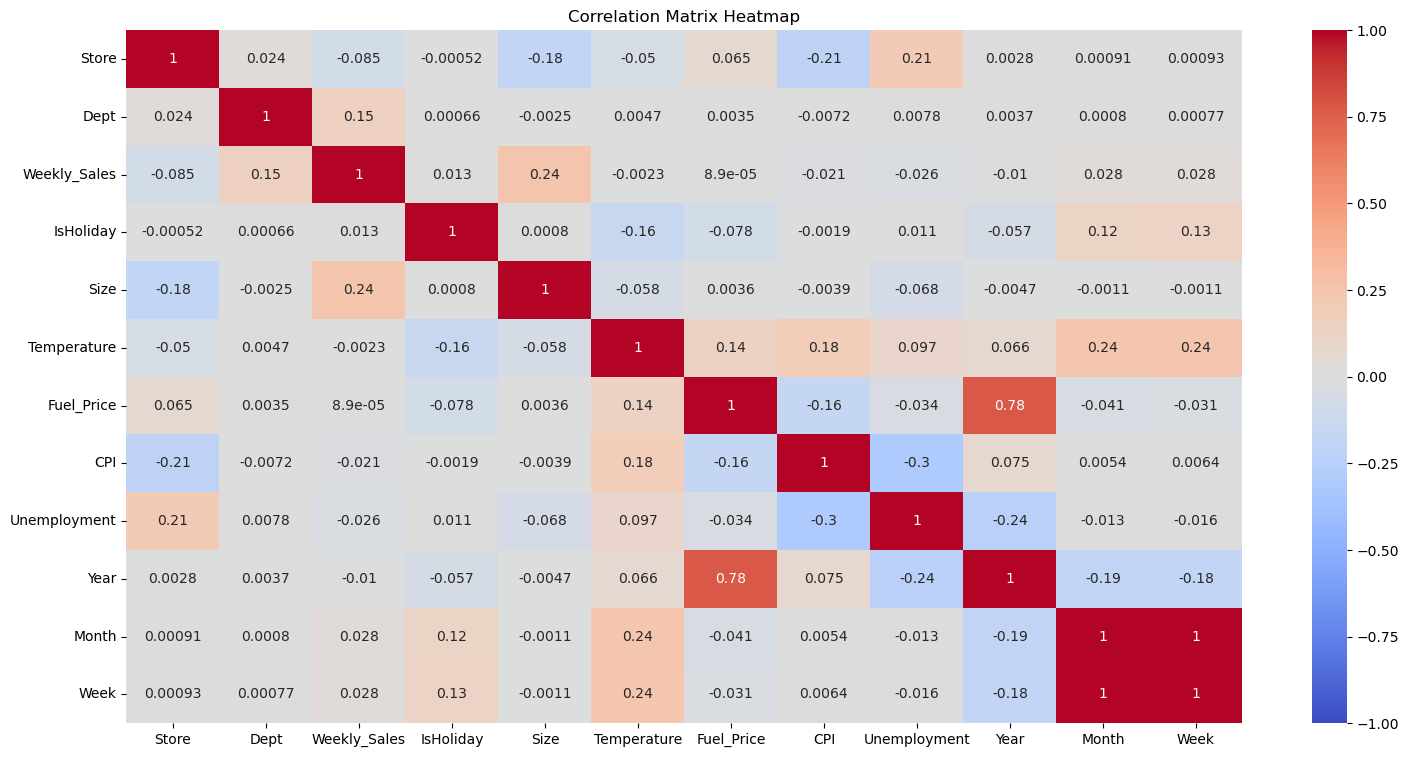

In [36]:
plt.figure(figsize=(18, 9))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation heatmap illustrates relationships between variables in the dataset. Key observations include:
- Strong positive correlation (0.78) between Fuel Price and Year, indicating a notable trend over time.
- Moderate positive correlation (0.24) between Size and Weekly Sales, suggesting larger stores tend to generate higher sales.
- Moderate positive correlations (0.24) between Temperature, Month, and Week, indicating seasonal influences on temperature trends.
- Moderate positive correlation (0.21) between Unemployment and Store, suggesting potential impacts of local economic conditions on store performance.


### Fuel Price vs Year 
Positive correlation

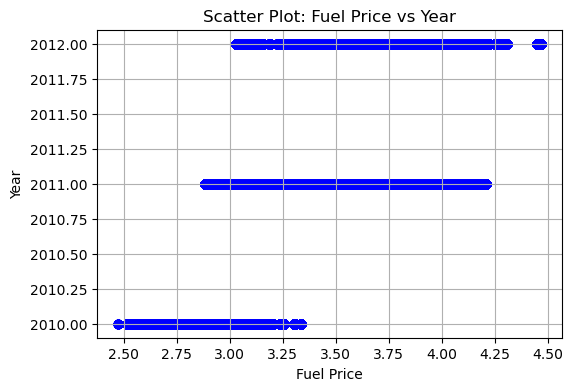

In [37]:

plt.figure(figsize=(6, 4))
plt.scatter(data['Fuel_Price'], data['Year'], alpha=0.5, c='blue')
plt.title('Scatter Plot: Fuel Price vs Year')
plt.xlabel('Fuel Price')
plt.ylabel('Year')
plt.grid(True)
plt.show()


### Size vs Weekly Sales

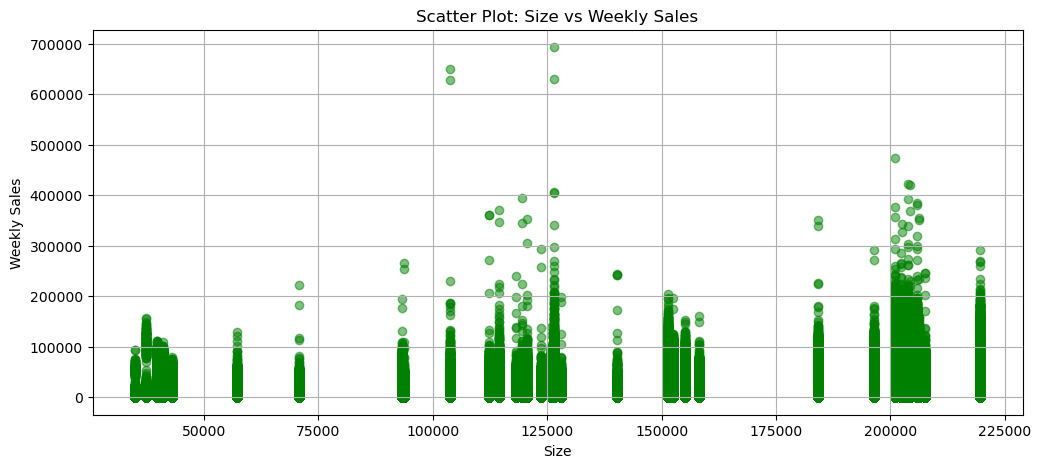

In [38]:
plt.figure(figsize=(12, 5))
plt.scatter(data['Size'], data['Weekly_Sales'], alpha=0.5, c='green')
plt.title('Scatter Plot: Size vs Weekly Sales')
plt.xlabel('Size')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()


### Average weekly sales by store 

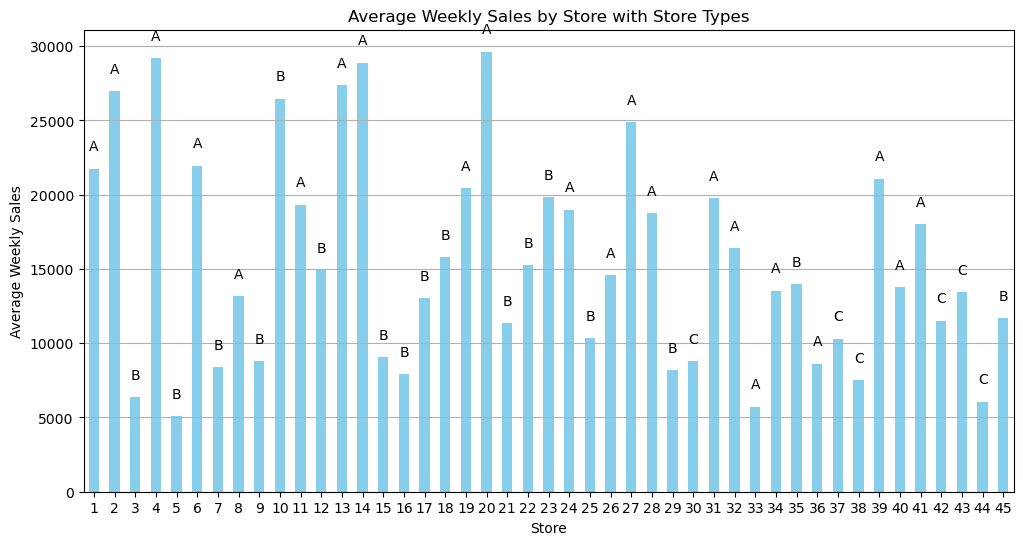

In [39]:
sales_by_store = data.groupby('Store')['Weekly_Sales'].mean()

store_types = data.groupby('Store')['Type'].first()

plt.figure(figsize=(12, 6))
sales_by_store.plot(kind='bar', color='skyblue')
plt.title('Average Weekly Sales by Store with Store Types')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0)

for i, store in enumerate(sales_by_store.index):
    plt.text(i, sales_by_store[store] + 1000, store_types[store], ha='center', va='bottom')

plt.grid(axis='y')
plt.show()

###  Store vs Unemployment 

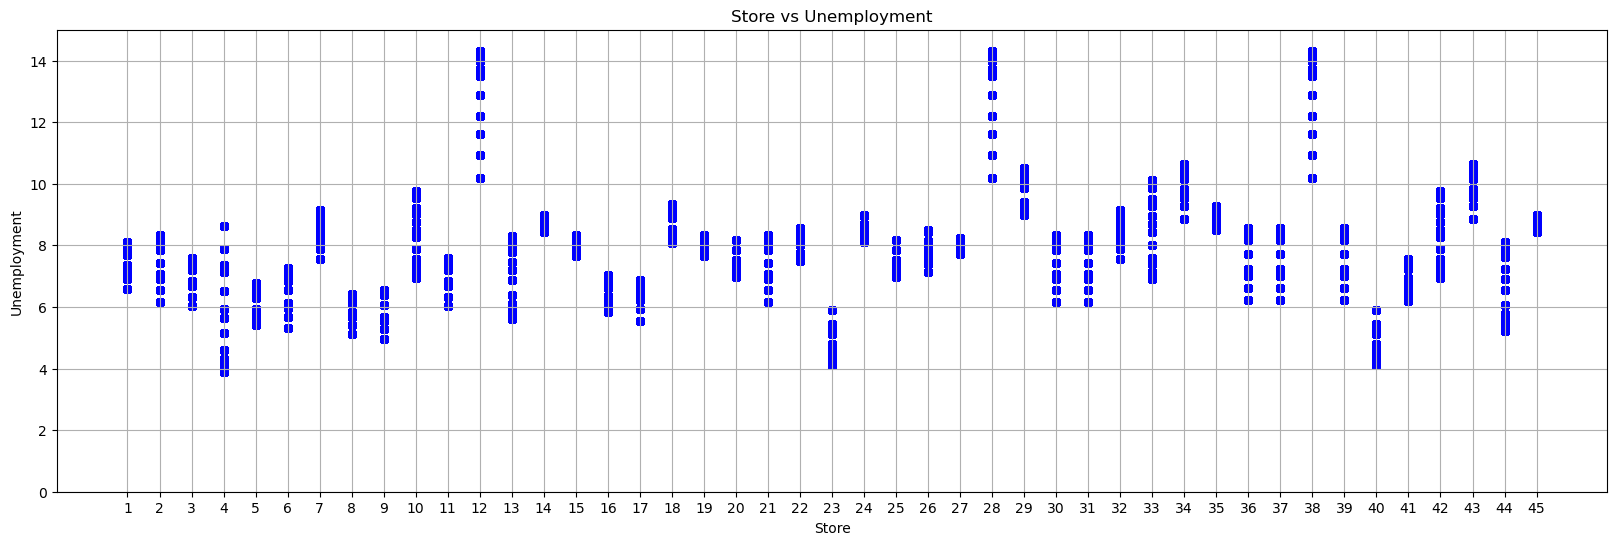

In [40]:
x = data['Store']
y = data['Unemployment']

plt.figure(figsize=(20, 6))
plt.scatter(x, y, alpha=0.6, color='blue', s=5)  

plt.title('Store vs Unemployment')
plt.xlabel('Store')
plt.ylabel('Unemployment')

plt.grid(True)

plt.xticks(range(1, data['Store'].nunique() + 1))
plt.ylim(0, 15) 
plt.show()

### Which weeks had the maximum of sales?

In [41]:
data.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,2010,2,5
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,2010,2,6
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,2010,2,7
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,2010,2,8
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,2010,3,9
5,1,1,2010-03-12,21043.39,False,A,151315,57.79,2.667,211.380643,8.106,2010,3,10
6,1,1,2010-03-19,22136.64,False,A,151315,54.58,2.720,211.215635,8.106,2010,3,11
7,1,1,2010-03-26,26229.21,False,A,151315,51.45,2.732,211.018042,8.106,2010,3,12
8,1,1,2010-04-02,57258.43,False,A,151315,62.27,2.719,210.820450,7.808,2010,4,13
9,1,1,2010-04-09,42960.91,False,A,151315,65.86,2.770,210.622857,7.808,2010,4,14


In [42]:
season_map = {
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Autumn',
    10: 'Autumn', 11: 'Autumn', 12: 'Winter'
}

In [43]:
data['Season'] = data['Date'].map(season_map)


C:\Users\ALA\AppData\Local\Temp\ipykernel_19996\3722472404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Season'] = data['Date'].map(season_map)


In [44]:
data.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Season
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,2010,2,5,NaN
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,2010,2,6,NaN
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,2010,2,7,NaN
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,2010,2,8,NaN
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,211.350143,8.106,2010,3,9,NaN
5,1,1,2010-03-12,21043.39,False,A,151315,57.79,2.667,211.380643,8.106,2010,3,10,NaN
6,1,1,2010-03-19,22136.64,False,A,151315,54.58,2.720,211.215635,8.106,2010,3,11,NaN
7,1,1,2010-03-26,26229.21,False,A,151315,51.45,2.732,211.018042,8.106,2010,3,12,NaN
8,1,1,2010-04-02,57258.43,False,A,151315,62.27,2.719,210.820450,7.808,2010,4,13,NaN
9,1,1,2010-04-09,42960.91,False,A,151315,65.86,2.770,210.622857,7.808,2010,4,14,NaN


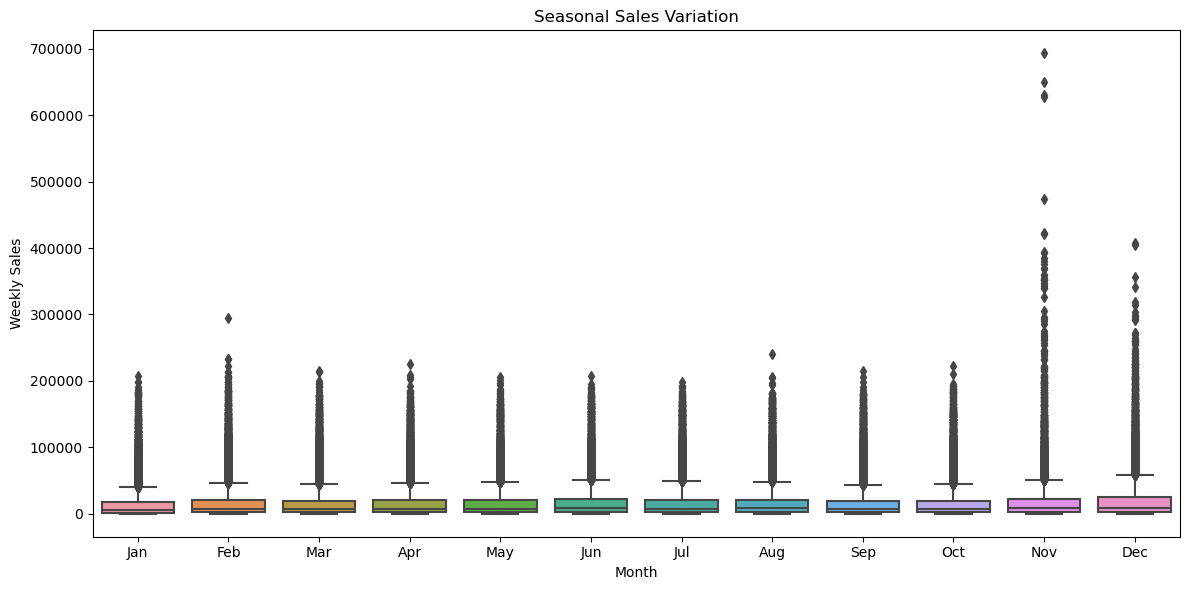

In [47]:

plt.figure(figsize=(12, 6))
sb.boxplot(x='Month', y='Weekly_Sales', data=data)
plt.title('Seasonal Sales Variation')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

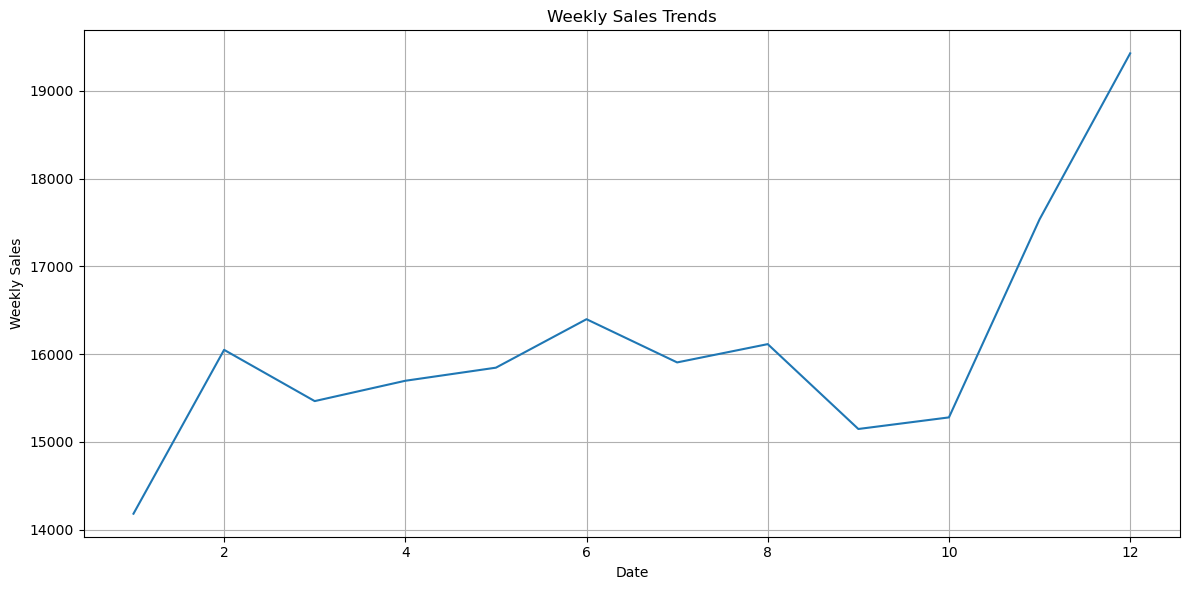

In [48]:

plt.figure(figsize=(12, 6))
sb.lineplot(x='Month', y='Weekly_Sales', data=data, ci=None)
plt.title('Weekly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

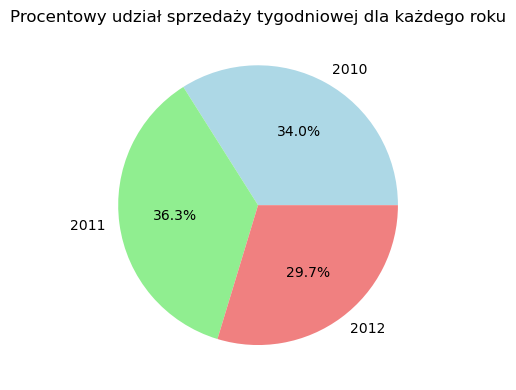

In [49]:

sales_by_year = data.groupby('Year')['Weekly_Sales'].sum()

percent_sales = sales_by_year / sales_by_year.sum() * 100

plt.figure(figsize=(4, 4))
percent_sales.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Percentage of weekly sales for each year')
plt.ylabel('')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Month'>

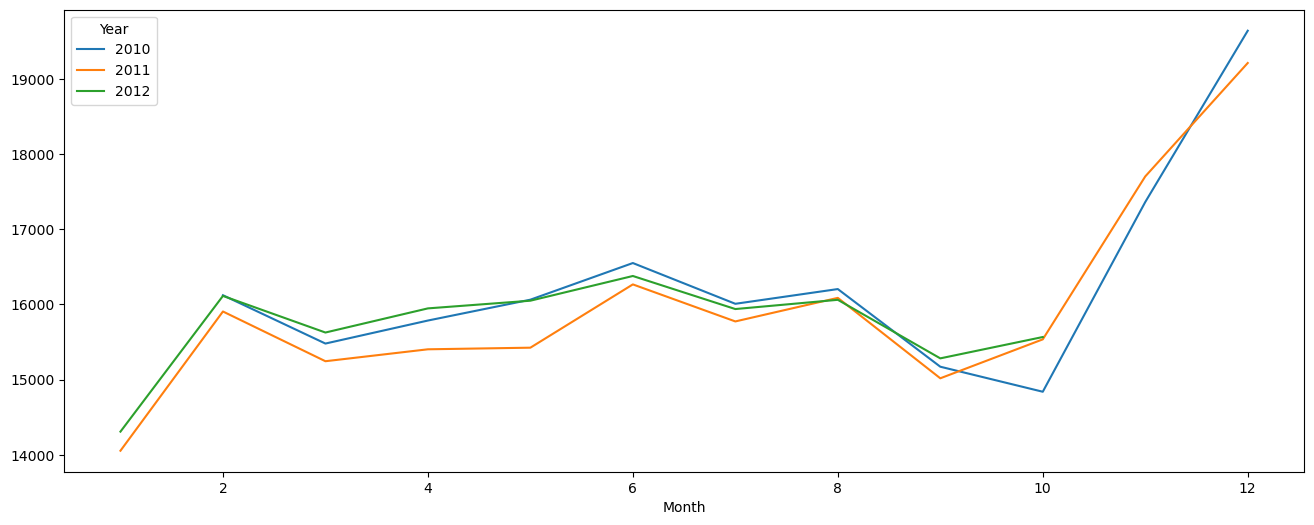

In [50]:
month_wise_sales = pd.pivot_table( data, values = "Weekly_Sales", columns = "Year", index = "Month")
month_wise_sales.plot(figsize=(16, 6))

### steady reduction in unemployment rate was noticed:


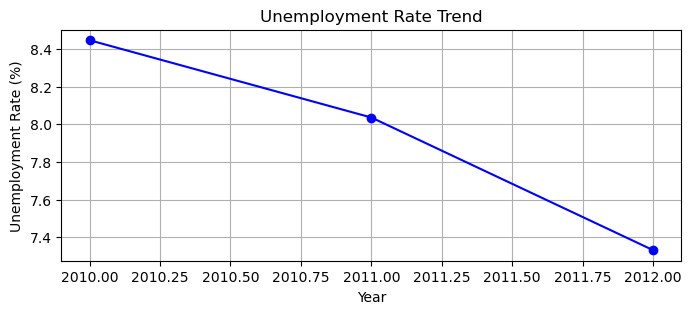

In [51]:

average_unemployment = data.groupby('Year')['Unemployment'].mean()

plt.figure(figsize=(8, 3))
plt.plot(average_unemployment.index, average_unemployment.values, marker='o', linestyle='-', color='b', label='Unemployment Rate')

plt.title('Unemployment Rate Trend')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')

plt.grid(True)

plt.show()

In [52]:

def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Unknown'

data['Season'] = data['Month'].apply(month_to_season)

C:\Users\ALA\AppData\Local\Temp\ipykernel_19996\17745782.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Season'] = data['Month'].apply(month_to_season)


In [53]:
data.head(4)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Season
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,2010,2,5,Winter
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,211.242170,8.106,2010,2,6,Winter
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,211.289143,8.106,2010,2,7,Winter
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,211.319643,8.106,2010,2,8,Winter


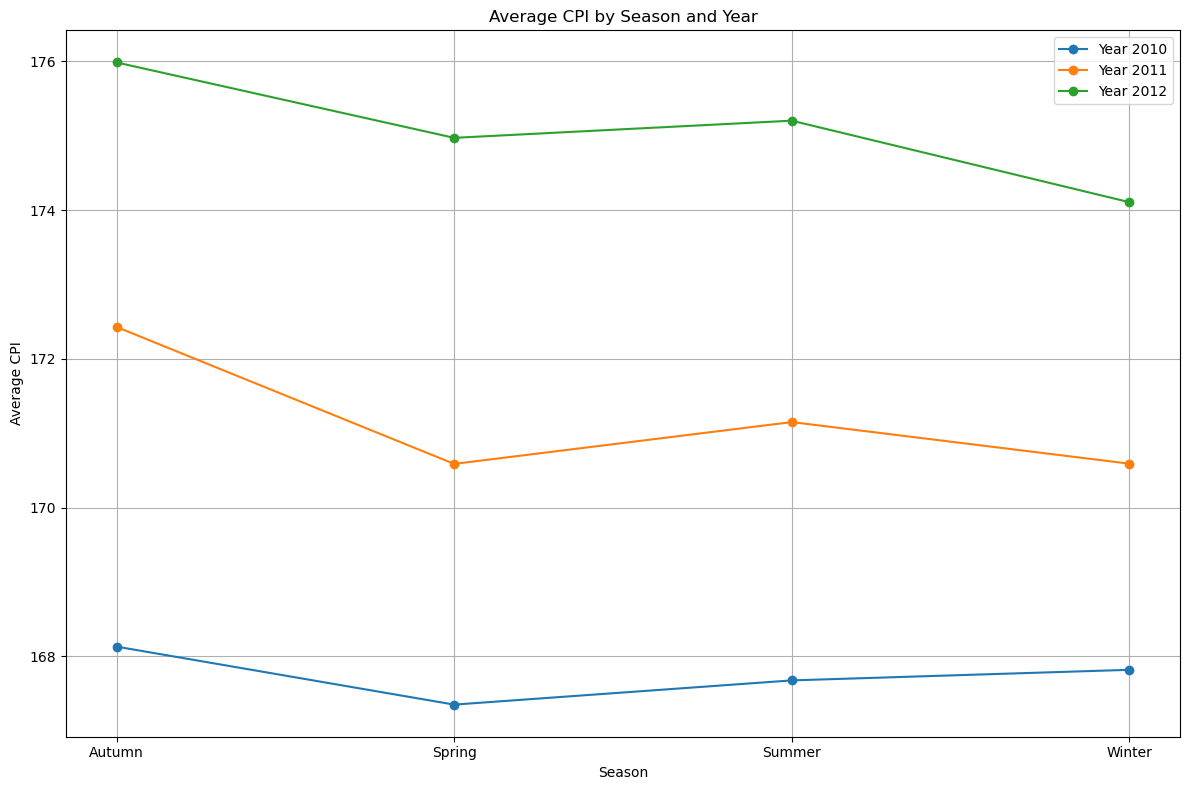

In [55]:

avg_cpi_season = data.groupby(['Year', 'Season'])['CPI'].mean().unstack()


plt.figure(figsize=(12, 8))


for year in avg_cpi_season.index:
    plt.plot(avg_cpi_season.columns, avg_cpi_season.loc[year], marker='o', label=f'Year {year}')


plt.title('Average CPI by Season and Year')
plt.xlabel('Season')
plt.ylabel('Average CPI')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

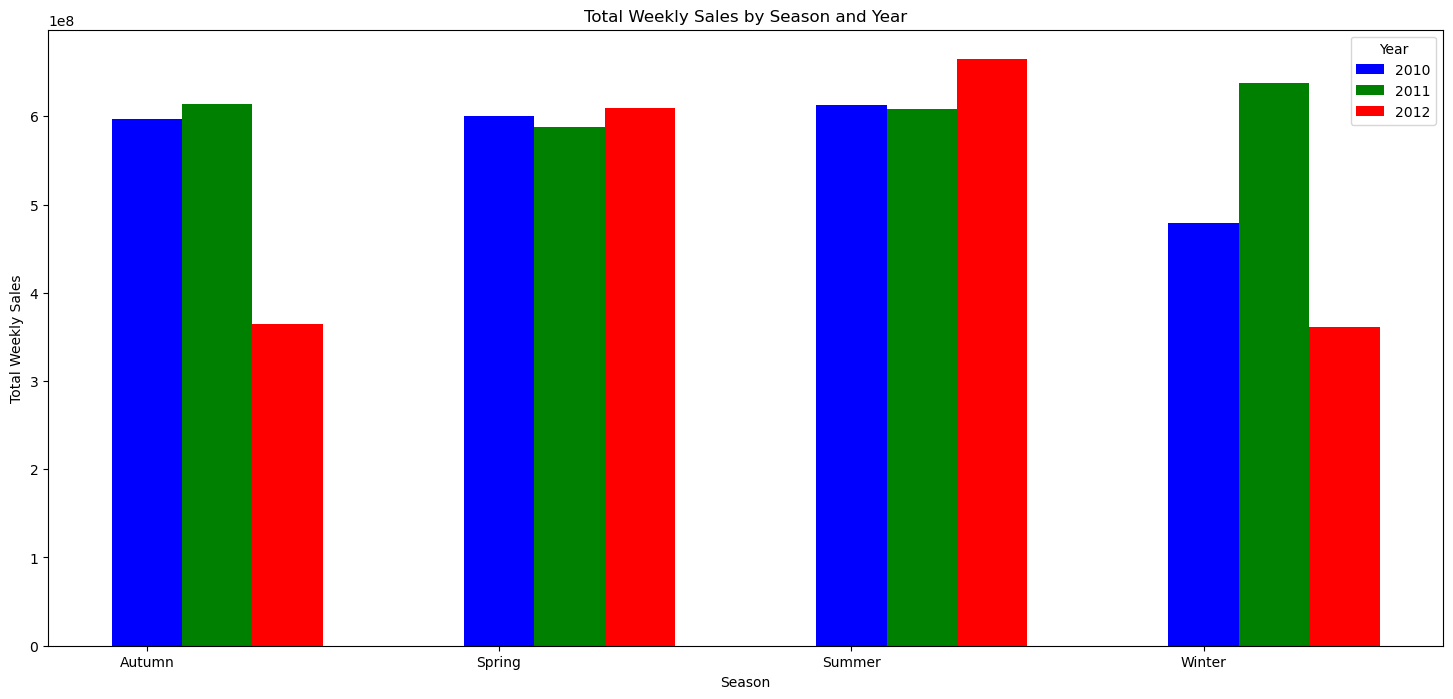

In [56]:

sales_by_season = data.groupby(['Year', 'Season'])['Weekly_Sales'].sum().unstack()

plt.figure(figsize=(18, 8))


bar_width = 0.2 
years = sales_by_season.index
num_seasons = len(sales_by_season.columns)
bar_positions = [i + 1.5 * bar_width * (j - (num_seasons - 1) / 2) for i in range(num_seasons) for j in range(len(years))]
colors = ['b', 'g', 'r']  

for i, year in enumerate(years):
    plt.bar([pos + i * bar_width for pos in range(num_seasons)], sales_by_season.loc[year], width=bar_width,
            label=year, color=colors[i])


plt.xlabel('Season')
plt.ylabel('Total Weekly Sales')
plt.title('Total Weekly Sales by Season and Year')
plt.xticks(range(num_seasons), sales_by_season.columns) 
plt.legend(title='Year')


plt.show()


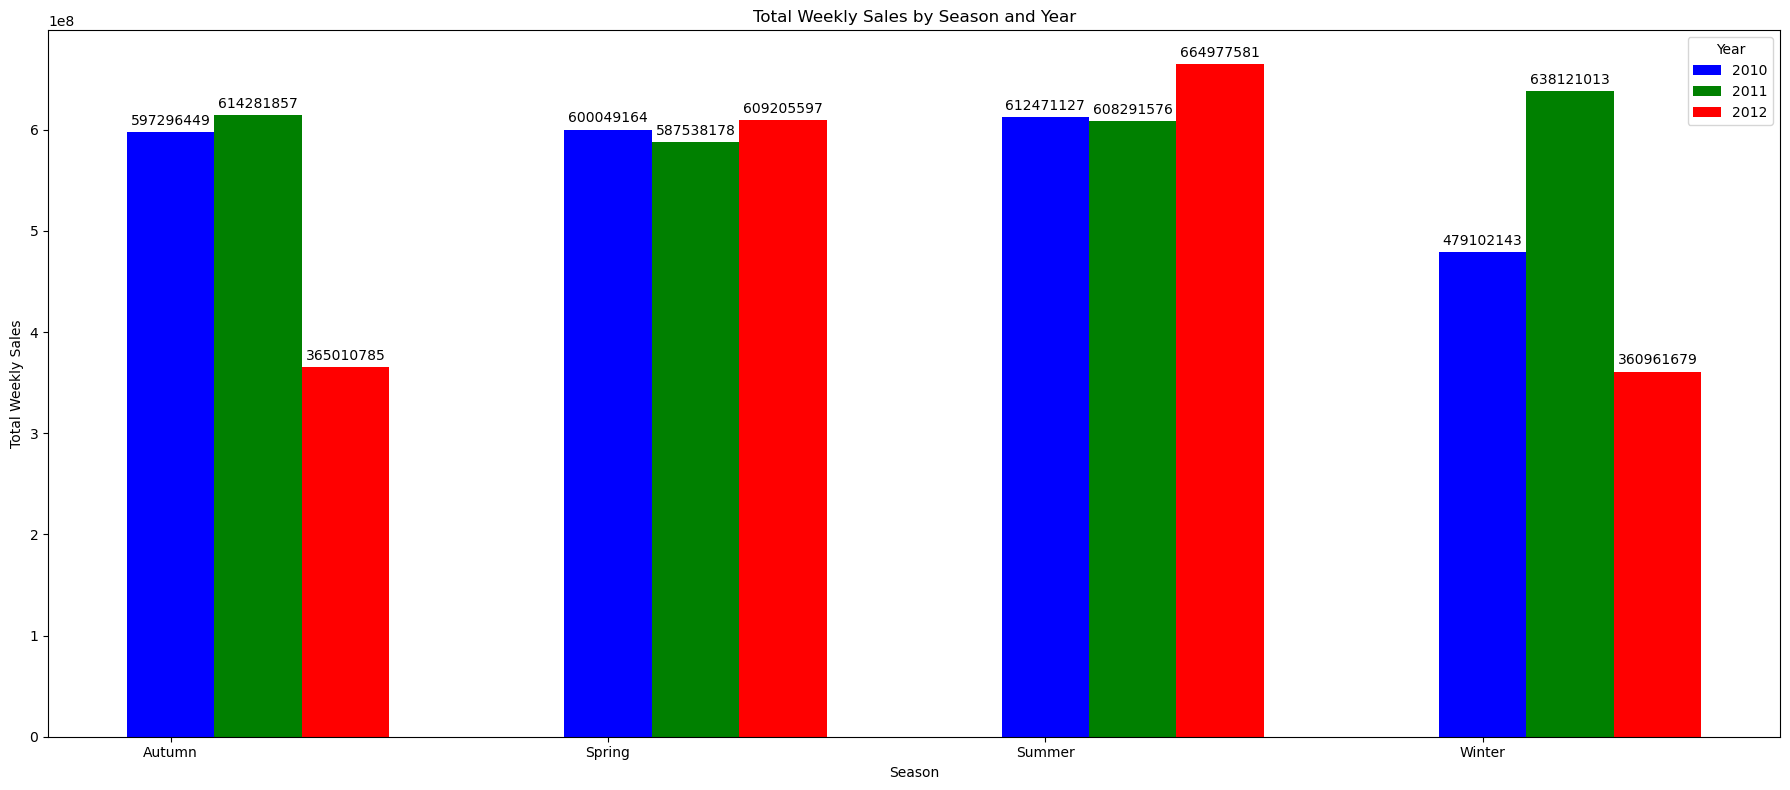

In [57]:


sales_by_season = data.groupby(['Year', 'Season'])['Weekly_Sales'].sum().unstack()


plt.figure(figsize=(18, 8))


bar_width = 0.2
years = sales_by_season.index
num_seasons = len(sales_by_season.columns)
bar_positions = [i + 1.5 * bar_width * (j - (num_seasons - 1) / 2) for i in range(num_seasons) for j in range(len(years))]
colors = ['b', 'g', 'r']


bars = []
for i, year in enumerate(years):
    bars.append(plt.bar([pos + i * bar_width for pos in range(num_seasons)], sales_by_season.loc[year], width=bar_width,
                        label=year, color=colors[i]))


for bar in bars:
    for rect in bar:
        height = rect.get_height()
        plt.annotate(f'{height:.0f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points", ha='center', va='bottom')


plt.xlabel('Season')
plt.ylabel('Total Weekly Sales')
plt.title('Total Weekly Sales by Season and Year')
plt.xticks(range(num_seasons), sales_by_season.columns)
plt.legend(title='Year')


plt.tight_layout()
plt.show()

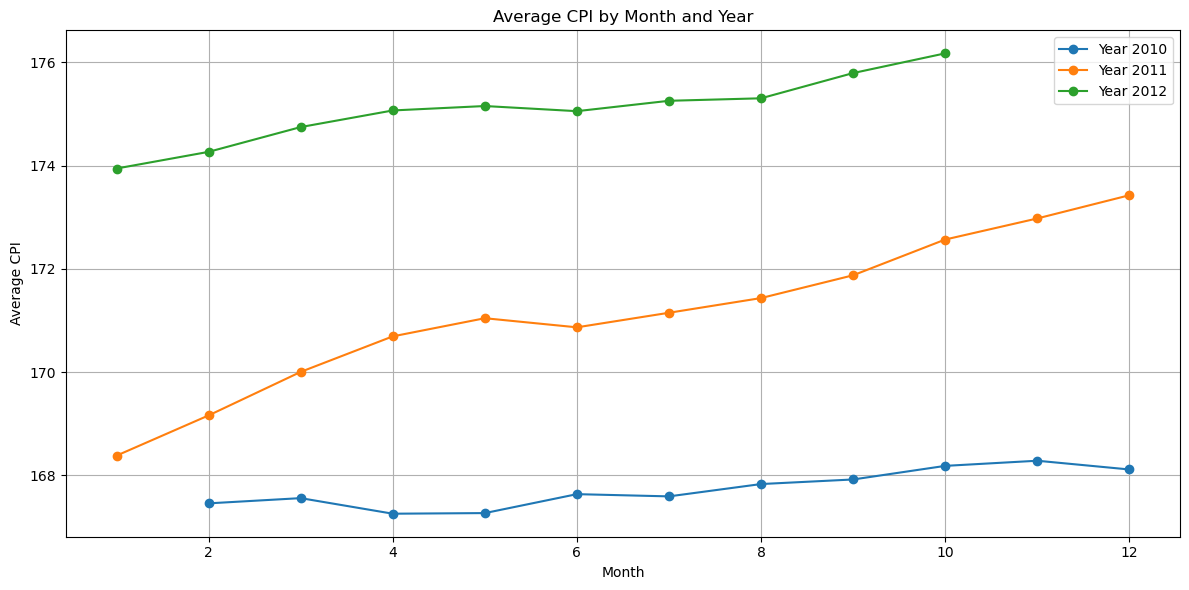

In [58]:
# Group by Year and Month, calculate mean of CPI
avg_cpi_month = data.groupby(['Year', 'Month'])['CPI'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 6))

# Plot each year's average CPI by month
for year in avg_cpi_month.index:
    plt.plot(avg_cpi_month.columns, avg_cpi_month.loc[year], marker='o', label=f'Year {year}')

# Adding labels and title
plt.title('Average CPI by Month and Year')
plt.xlabel('Month')
plt.ylabel('Average CPI')
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [59]:
jan_2010_data = data[(data['Month'] == 1) & (data['Year'] == 2010)]
print(jan_2010_data)


Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday, Type, Size, Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Week, Season]
Index: []


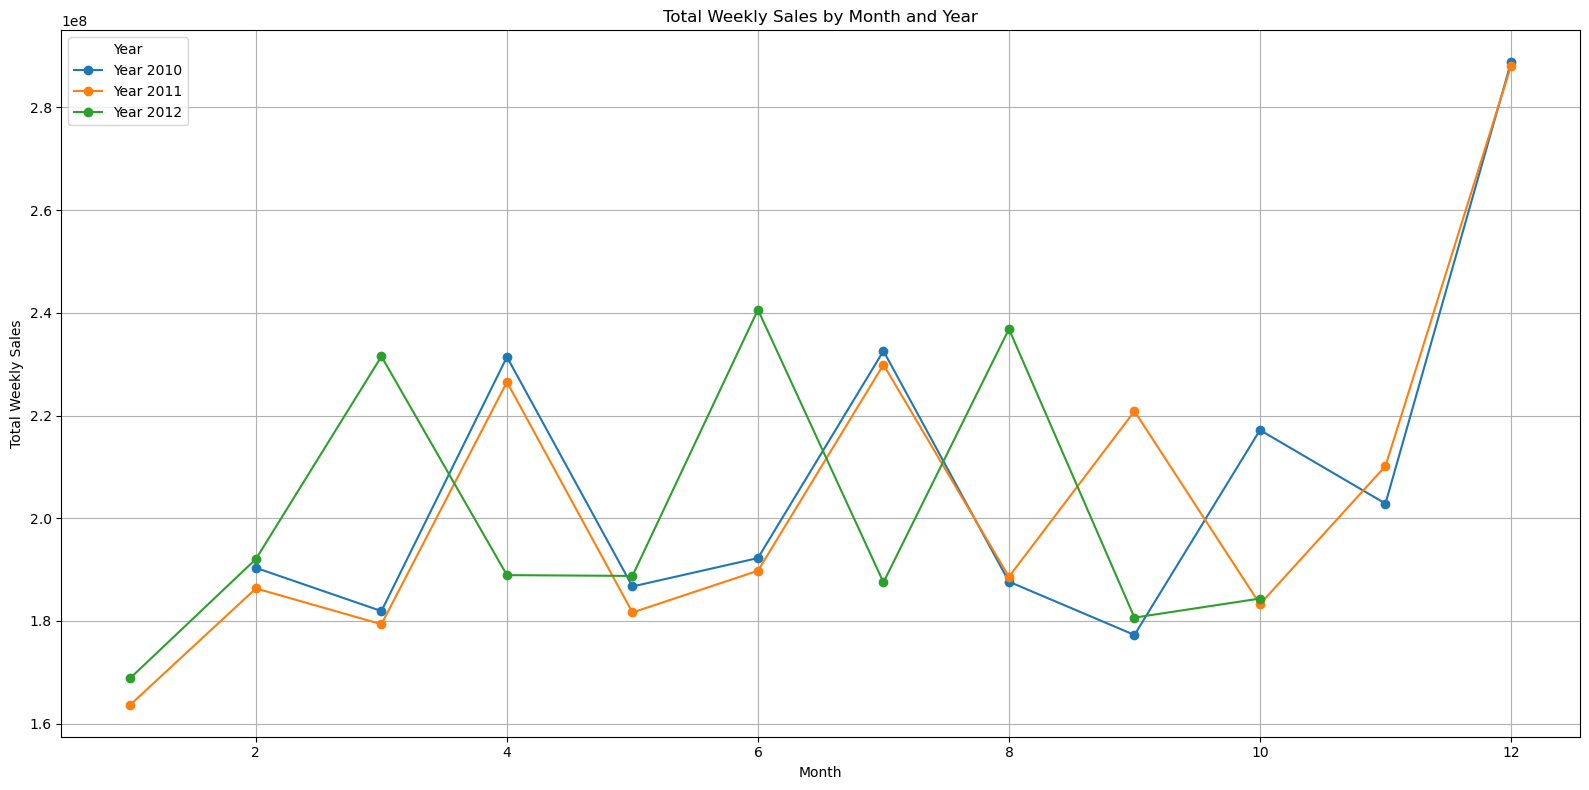

In [60]:
# Przygotowanie danych
sales_by_month = data.groupby(['Year', 'Month'])['Weekly_Sales'].sum().unstack()

# Stworzenie wykresu
plt.figure(figsize=(16, 8))

years = sales_by_month.index.get_level_values(0).unique()  # Get unique years

for year in years:
    plt.plot(sales_by_month.columns, sales_by_month.loc[year], marker='o', label=f'Year {year}')

# Dodanie tytułu i etykiet osi
plt.title('Total Weekly Sales by Month and Year')
plt.xlabel('Month')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.legend(title='Year')

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()

### LabelEncoder do przekształcenia kategorialnych danych tekstowych ('IsHoliday' i 'Type') na liczby całkowite

In [61]:

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

data['IsHoliday']= label_encoder.fit_transform(data['IsHoliday'])
data['Type']= label_encoder.fit_transform(data['Type'])

data

C:\Users\ALA\AppData\Local\Temp\ipykernel_19996\1282830041.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IsHoliday']= label_encoder.fit_transform(data['IsHoliday'])
C:\Users\ALA\AppData\Local\Temp\ipykernel_19996\1282830041.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Type']= label_encoder.fit_transform(data['Type'])


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Season
0,1,1,2010-02-05,24924.50,0,0,151315,42.31,2.572,211.096358,8.106,2010,2,5,Winter
1,1,1,2010-02-12,46039.49,1,0,151315,38.51,2.548,211.242170,8.106,2010,2,6,Winter
2,1,1,2010-02-19,41595.55,0,0,151315,39.93,2.514,211.289143,8.106,2010,2,7,Winter
3,1,1,2010-02-26,19403.54,0,0,151315,46.63,2.561,211.319643,8.106,2010,2,8,Winter
4,1,1,2010-03-05,21827.90,0,0,151315,46.50,2.625,211.350143,8.106,2010,3,9,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,1,118221,64.88,3.997,192.013558,8.684,2012,9,39,Autumn
421566,45,98,2012-10-05,628.10,0,1,118221,64.89,3.985,192.170412,8.667,2012,10,40,Autumn
421567,45,98,2012-10-12,1061.02,0,1,118221,54.47,4.000,192.327265,8.667,2012,10,41,Autumn
421568,45,98,2012-10-19,760.01,0,1,118221,56.47,3.969,192.330854,8.667,2012,10,42,Autumn


## Clustering similar shops

### Feature importance 

In [62]:
data = data.drop(['Season'],axis=1)
data=data.drop(['Date'],axis=1)

In [63]:
print("Przed selekcją cech:")
print(data)

selector = VarianceThreshold(threshold=0.2)
selected_features = selector.fit_transform(data)


selected_data = pd.DataFrame(selected_features, columns=data.columns[selector.get_support()])

print("\nPo selekcji cech:")
print(selected_data)

Przed selekcją cech:
        Store  Dept  Weekly_Sales  IsHoliday  Type    Size  Temperature  \
0           1     1      24924.50          0     0  151315        42.31   
1           1     1      46039.49          1     0  151315        38.51   
2           1     1      41595.55          0     0  151315        39.93   
3           1     1      19403.54          0     0  151315        46.63   
4           1     1      21827.90          0     0  151315        46.50   
...       ...   ...           ...        ...   ...     ...          ...   
421565     45    98        508.37          0     1  118221        64.88   
421566     45    98        628.10          0     1  118221        64.89   
421567     45    98       1061.02          0     1  118221        54.47   
421568     45    98        760.01          0     1  118221        56.47   
421569     45    98       1076.80          0     1  118221        58.85   

        Fuel_Price         CPI  Unemployment  Year  Month  Week  
0           

### using K-means

#### data preparation for clustering

In [64]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

In [65]:
scaled_data

array([[-1.65756196, -1.4173397 ,  0.39118322, ..., -1.21528046,
        -1.37197868, -1.4717152 ],
       [-1.65756196, -1.4173397 ,  1.32015317, ..., -1.21528046,
        -1.37197868, -1.40105616],
       [-1.65756196, -1.4173397 ,  1.12463867, ..., -1.21528046,
        -1.37197868, -1.33039713],
       ...,
       [ 1.78337339,  1.76207262, -0.65870862, ...,  1.29445244,
         1.09457424,  1.07201003],
       [ 1.78337339,  1.76207262, -0.67195178, ...,  1.29445244,
         1.09457424,  1.14266907],
       [ 1.78337339,  1.76207262, -0.65801437, ...,  1.29445244,
         1.09457424,  1.2133281 ]])


#### Determine the optimal number of clusters using the Elbow method 

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


SSE (Sum of Squared Errors) or Inertia:

This is a measure of how tightly the clusters are packed. It sums up the squared distances between each point and the centroid of the cluster it belongs to.
Lower SSE values indicate better-defined clusters.
Inertia is used in the Elbow method to determine the optimal number of clusters.

In [83]:
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

In [84]:
sse

[4343800.283463847,
 3875968.337021914,
 3552050.26704827,
 3337486.5704683056,
 3167926.8110663383,
 2997770.665892986,
 2861944.784156394,
 2760171.769396992,
 2652137.771757834]

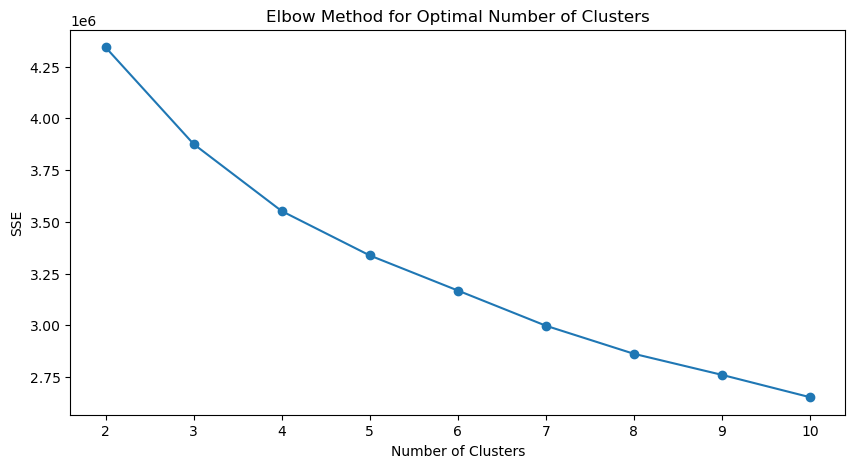

In [91]:
# Plot SSE to identify the elbow point
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

From chart above we can assume that k = 4 woud be a right choice 

#### Selecting the number of clusters with silhouette analysis

he plot of Silhouette scores helps to determine the optimal number of clusters by looking for the maximum score, which indicates the best-defined clusters.

In [108]:
silhouette_scores = []

In [109]:
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    sample_size = 50000 
    silhouette_avg = silhouette_score(scaled_data, labels, sample_size=sample_size)
    print(f"For n_clusters = {k}, the average silhouette score is: {silhouette_avg}")


For n_clusters = 2, the average silhouette score is: 0.1384769084011647
For n_clusters = 3, the average silhouette score is: 0.14098702059402324
For n_clusters = 4, the average silhouette score is: 0.14512721211520058
For n_clusters = 5, the average silhouette score is: 0.13981344669297718
For n_clusters = 6, the average silhouette score is: 0.1298273897665448
For n_clusters = 7, the average silhouette score is: 0.13301679041656247
For n_clusters = 8, the average silhouette score is: 0.13760545478451183
For n_clusters = 9, the average silhouette score is: 0.1293500190428785
For n_clusters = 10, the average silhouette score is: 0.1333818885323375


### choose the optimal number of clusters and fit the K-means model

In [110]:
optimal_clusters = 4  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)


### Comparing Stores Within Clusters

In [136]:

for cluster in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"Cluster {cluster} Summary:")
    print(cluster_data.describe())


Cluster 0 Summary:
              Store          Dept   Weekly_Sales     IsHoliday          Type  \
count  58659.000000  58659.000000   58659.000000  58659.000000  58659.000000   
mean      37.311615     46.440239    9542.690203      0.056155      1.706013   
std        7.639298     32.989879   14771.848985      0.230223      0.473067   
min       12.000000      1.000000       0.010000      0.000000      0.000000   
25%       35.000000     16.000000     265.135000      0.000000      1.000000   
50%       38.000000     40.000000    2837.140000      0.000000      2.000000   
75%       43.000000     81.000000   12850.320000      0.000000      2.000000   
max       45.000000     99.000000  112152.350000      1.000000      2.000000   

                Size   Temperature    Fuel_Price           CPI  Unemployment  \
count   58659.000000  58659.000000  58659.000000  58659.000000  58659.000000   
mean    59145.738079     68.630185      3.437941    165.067353      9.191528   
std     30499.012243

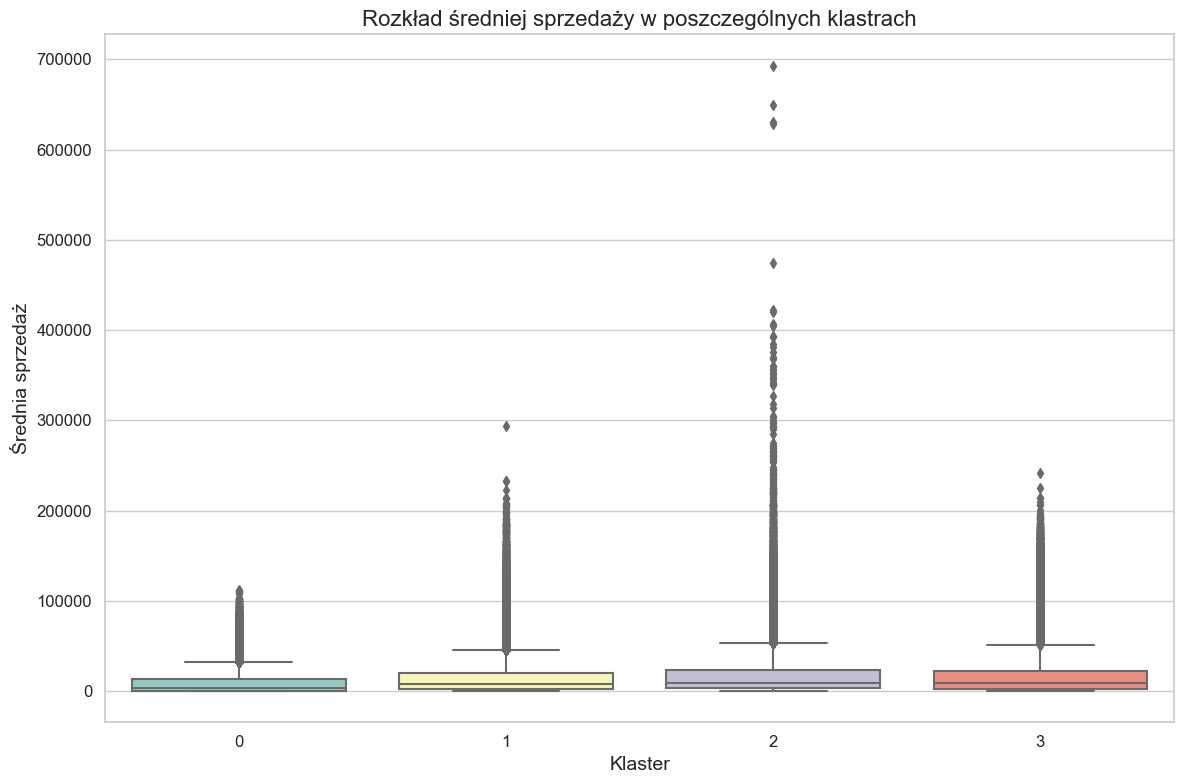

In [140]:

sb.set(style="whitegrid")


plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Weekly_Sales', data=data, palette='Set3')


plt.title('Rozkład średniej sprzedaży w poszczególnych klastrach', fontsize=16)
plt.xlabel('Klaster', fontsize=14)
plt.ylabel('Średnia sprzedaż', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()



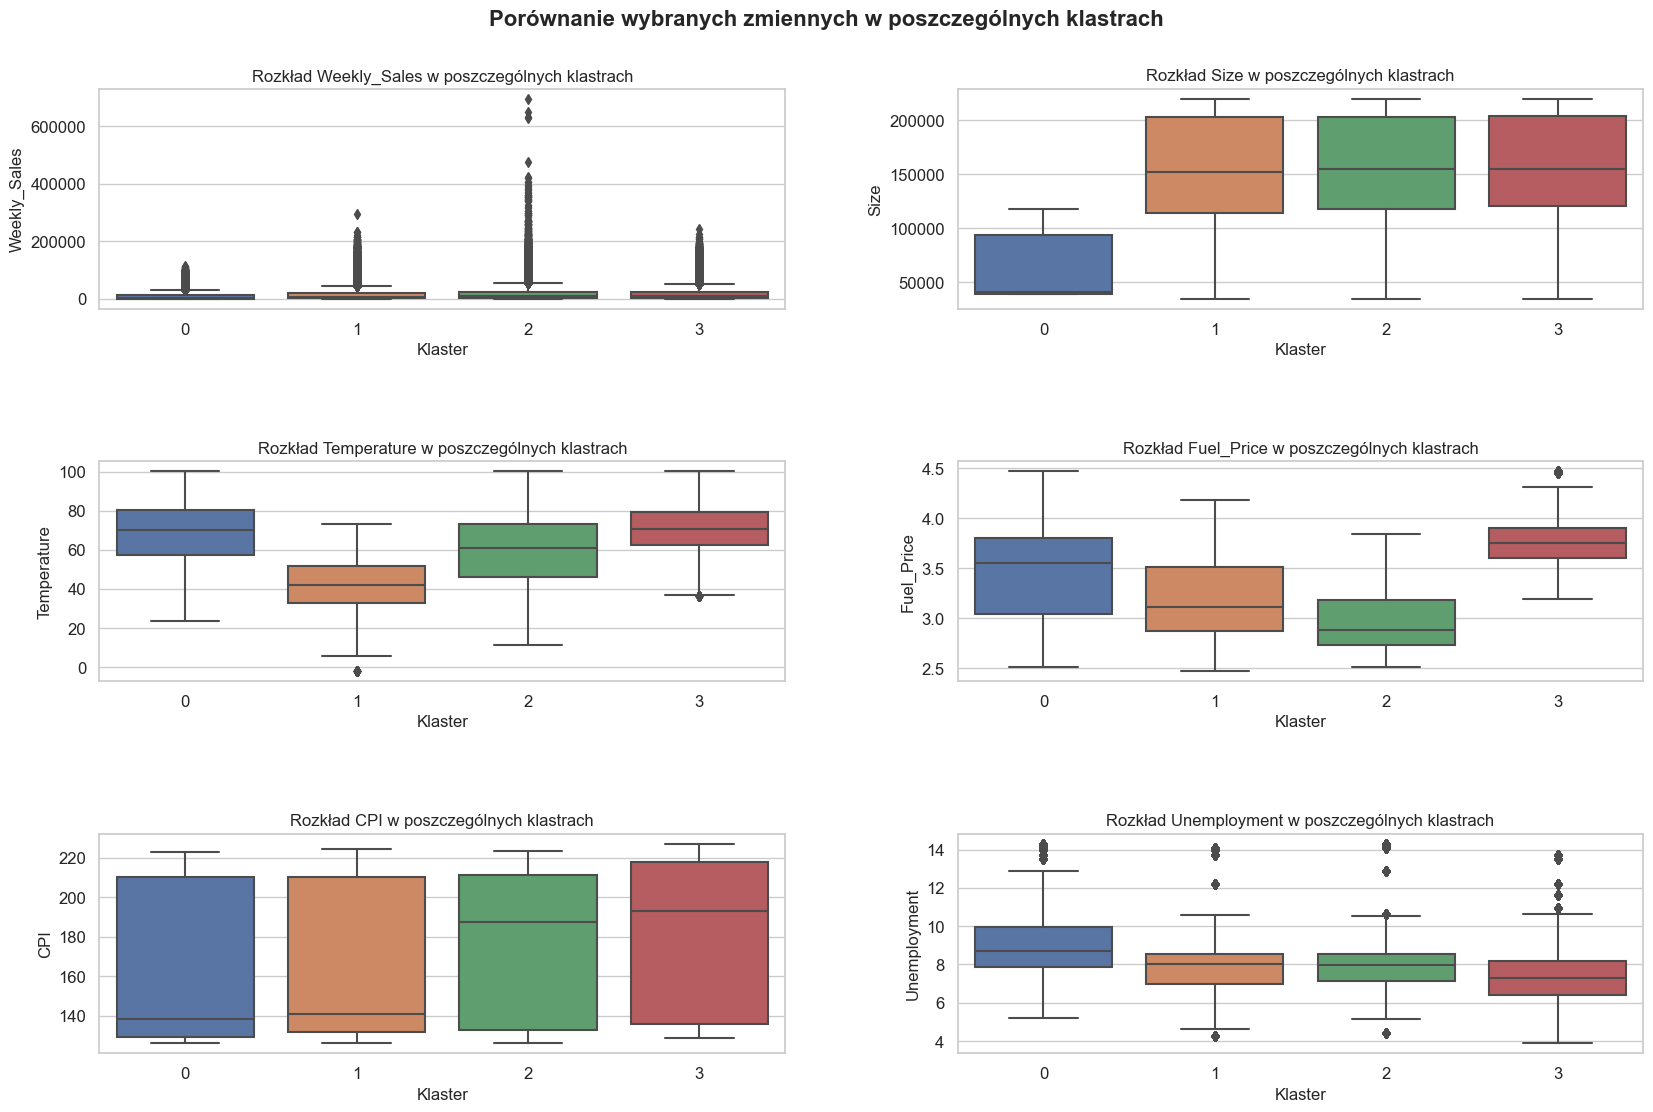

In [135]:

variables = ['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

plt.figure(figsize=(18, 12))

for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Cluster', y=var, data=data)
    plt.title(f'Rozkład {var} w poszczególnych klastrach')
    plt.xlabel('Klaster')
    plt.ylabel(var)
    plt.xticks(fontsize=12) 
    plt.yticks(fontsize=12) 
    plt.tight_layout(pad=5.0)  

plt.suptitle('Porównanie wybranych zmiennych w poszczególnych klastrach', fontsize=16, fontweight='bold')
plt.show()


In [150]:
variables = ['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Dept', 'Type']
cluster_summary = data.groupby('Cluster')[variables].describe().transpose()

In [152]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

cluster_summary

Cluster                         0              1              2              3
Weekly_Sales count   58659.000000  104321.000000  116492.000000  140740.000000
             mean     9542.690203   15719.272778   18081.958454   17275.037120
             std     14771.848985   21867.599453   25469.170251   23185.440341
             min         0.010000       0.010000       0.010000       0.010000
             25%       265.135000    2435.280000    2884.240000    2709.770000
             50%      2837.140000    7736.050000    8902.960000    8441.570000
             75%     12850.320000   19464.900000   23031.840000   22229.995000
             max    112152.350000  293966.050000  693099.360000  241120.000000
Size         count   58659.000000  104321.000000  116492.000000  140740.000000
             mean    59145.738079  147044.337315  148886.949885  151417.493143
             std     30499.012243   54175.547636   55014.112640   55798.099313
             min     39690.000000   34875.000000   34875.000000   34875.000000
             25%     39690.000000  114533.000000  118221.000000  120653.000000
             50%     41062.000000  152513.000000  155078.000000  155078.000000
             75%     93638.000000  203007.000000  203007.000000  203742.000000
             max    118221.000000  219622.000000  219622.000000  219622.000000
Temperature  count   58659.000000  104321.000000  116492.000000  140740.000000
             mean       68.630185      42.153242      59.107641      70.640736
             std        14.883494      13.344686      17.941766      12.014873
             min        23.350000      -2.060000      11.170000      36.540000
             25%        57.300000      32.630000      46.000000      62.290000
             50%        70.190000      41.820000      60.930000      70.830000
             75%        80.380000      51.860000      73.210000      79.450000
             max       100.140000      73.290000     100.140000     100.070000
Fuel_Price   count   58659.000000  104321.000000  116492.000000  140740.000000
             mean        3.437941       3.191200       2.990893       3.760807
             std         0.456980       0.387545       0.316809       0.221851
             min         2.514000       2.472000       2.513000       3.187000
             25%         3.041000       2.869000       2.728000       3.601000
             50%         3.555000       3.116000       2.885000       3.750000
             75%         3.803000       3.513000       3.186000       3.903000
             max         4.468000       4.178000       3.842000       4.468000
CPI          count   58659.000000  104321.000000  116492.000000  140740.000000
             mean      165.067353     167.224754     171.549219     176.450861
             std        39.001600      37.524281      38.453865      40.280864
             min       126.064000     126.160226     126.064000     128.512193
             25%       129.325936     131.863129     132.661613     135.873839
             50%       138.495929     140.646136     187.691748     192.831317
             75%       210.182398     210.109275     211.259659     217.723523
             max       223.078337     224.374138     223.249677     227.232807
Unemployment count   58659.000000  104321.000000  116492.000000  140740.000000
             mean        9.191528       8.001997       8.052559       7.338971
             std         2.201425       1.746567       1.723740       1.614333
             min         5.217000       4.261000       4.420000       3.879000
             25%         7.874000       6.961000       7.127000       6.404000
             50%         8.684000       8.028000       7.951000       7.287000
             75%         9.966000       8.554000       8.523000       8.177000
             max        14.313000      14.099000      14.313000      13.736000
Dept         count   58659.000000  104321.000000  116492.000000  140740.000000
             mean       46.440239      43.721753  

In [147]:

cluster1_data = data[data['Cluster'] == 1]['Weekly_Sales']
cluster2_data = data[data['Cluster'] == 2]['Weekly_Sales']

t_stat, p_value = stats.ttest_ind(cluster2_data, cluster1_data, equal_var=False)
print(f"T-test for Weekly Sales between Cluster 1 and Cluster 2:\n"
      f"T-statistic: {t_stat}\n"
      f"P-value: {p_value}")

T-test for Weekly Sales between Cluster 1 and Cluster 2:
T-statistic: 23.448978965214312
P-value: 1.9091225785608774e-121


The t-test statistic of 23.45 with an extremely small p-value (approximately 1.91e-121) indicates a highly significant difference in weekly sales between Cluster 1 and Cluster 2. This suggests strong evidence that the average weekly sales differ significantly between these two clusters.

### Report

1. Weekly Sales Analysis:

Cluster 2 shows the highest average weekly sales $(18,081), followed by Cluster 1 ($15,719), Cluster 3 ($17,275), and Cluster 0 ($9,543). This indicates that stores in Cluster 2 are generally more profitable, possibly due to effective product assortment or promotional strategies.

2. Store Size:

Store sizes vary significantly across clusters, with Cluster 1 and Cluster 2 having the largest average store sizes (approximately 147,044 to 151,417 square feet).
This suggests that larger stores might cater to more diverse customer needs or have higher inventory turnover rates.

3. External Factors:

Fuel Price: Cluster 3 has the highest average fuel price ($3.76), which could impact operational costs and profit margins.
CPI (Consumer Price Index): Cluster 3 also has the highest CPI ($176.45), 
indicating potentially higher operating costs due to inflation.

Unemployment Rate: Cluster 0 has the highest average unemployment rate (9.19%), which may affect consumer spending patterns and store profitability.

4. Department and Store Type:

Department: The distribution of departments across clusters varies, which could influence sales performance depending on local consumer preferences.

Store Type: Cluster 0 predominantly consists of Type 2 stores (average of 1.7), while Clusters 1, 2, and 3 have a lower proportion of Type 2 stores (average ranging from 0.37 to 0.41). This variation in store types could impact sales strategies and customer engagement initiatives.

### Focus on Most Profitable Cluster
Introduction
This report focuses on Cluster 2, which represents the most profitable group of retail stores based on the analysis of key variables such as weekly sales, store size, temperature, fuel price, CPI, unemployment rate, department, and store type. The objective is to identify patterns and actionable insights that future entrepreneurs can leverage to improve their chances of success in the retail sector.

Key Findings for Cluster 2

1. Weekly Sales Analysis:

Average Weekly Sales: Cluster 2 exhibits the highest average weekly sales among all clusters, amounting to $18,081. This indicates that stores in this cluster are highly successful in generating revenue compared to others.

2. Store Size:

Average Store Size: Stores in Cluster 2 have an average size of approximately 148,887 square feet, which is significantly larger compared to other clusters. This larger footprint may allow for a wider range of products and services, catering to diverse customer needs.

3. External Factors:

Temperature and Climate: Cluster 2 has a moderate average temperature of about 59.11°F, suggesting that weather conditions might play a role in customer traffic and sales patterns.

Fuel Price: The average fuel price in Cluster 2 is $ 2.99, indicating potentially lower operating costs compared to clusters with higher fuel prices.

CPI (Consumer Price Index): With an average CPI of $171.55, Cluster 2 faces moderate inflationary pressures, influencing pricing and cost management strategies.

Unemployment Rate: The average unemployment rate in Cluster 2 is 8.05 %, which may affect consumer spending behavior but seems manageable compared to cluster 0.

4. Department and Store Type:

Department Distribution: Cluster 2 has a balanced distribution across departments, suggesting that a diverse product offering contributes to its profitability.
Store Type: The predominant store type in Cluster 2 is Type 0, which may indicate a strategic focus on specific customer segments or market niches.


Patterns and Insights: 

Based on the analysis of Cluster 2, future entrepreneurs can consider the following insights:

Invest in Larger Store Formats: Larger store sizes, as observed in Cluster 2, can accommodate a broader assortment of products and services, appealing to a wider customer base and potentially increasing sales volume.

Optimize Product Mix: Emphasize a diverse and well-curated product mix to cater to varying customer preferences and enhance overall sales performance.

Monitor Operational Costs: Keep operational costs, including fuel expenses, under control to maintain profitability margins. Cluster 2 benefits from a relatively lower fuel price environment, suggesting prudent cost management practices.

Adapt to Local Climate and Economic Conditions: Consider the impact of local climate and economic indicators (like CPI and unemployment rates) on consumer behavior and adjust business strategies accordingly.


